## Weather x Bixi Travel Volume analysis

In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy.stats as ss
from meteostat import Point, Daily
from datetime import datetime


### Clean trips data 2014 to 2019

In [31]:
def clean_bixi_data_by_year_14_19(year):
    # Define the folder path where the raw data is stored with the 'raw_data/' prefix
    folder_path = f'raw_data/BixiMontrealRentals{year}'
    save_folder = 'question2_data/trips/'
    save_file = f'{year}_cleaned.csv'
    
    # Create the save folder if it does not exist
    os.makedirs(save_folder, exist_ok=True)
    
    # Initialize an empty DataFrame to accumulate data
    all_data = pd.DataFrame(columns=['date', 'trips'])
    
    # Loop through the files in the folder
    for file_name in os.listdir(folder_path):
        # Look for files in the format "OD_{year}-{month}.csv"
        if file_name.startswith(f'OD_{year}-') and file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            
            # Read the CSV file
            try:
                df = pd.read_csv(file_path, parse_dates=['start_date', 'end_date'])
            except Exception as e:
                print(f"Could not read file {file_name}: {e}")
                continue
            
            # Extract the date from 'start_date' and count trips per day
            df['date'] = df['start_date'].dt.date  # Column named 'date' now
            trips_per_day = df.groupby('date').size().reset_index(name='trips')
            
            # Append the monthly data to the overall data
            all_data = pd.concat([all_data, trips_per_day], ignore_index=True)
    
    # Sort the data by date
    all_data = all_data.sort_values(by='date')
    
    # Save the cleaned data to a new CSV file
    all_data.to_csv(os.path.join(save_folder, save_file), index=False)

    print(f"Cleaned data saved to {os.path.join(save_folder, save_file)}")

# Example usage
for year in range(2014,2020):
    clean_bixi_data_by_year_14_19(year)


Cleaned data saved to question2_data/trips/2014_cleaned.csv
Cleaned data saved to question2_data/trips/2015_cleaned.csv
Cleaned data saved to question2_data/trips/2016_cleaned.csv
Cleaned data saved to question2_data/trips/2017_cleaned.csv
Cleaned data saved to question2_data/trips/2018_cleaned.csv


Cleaned data saved to question2_data/trips/2019_cleaned.csv


### Clean trips data 2020 to 2021

In [32]:
def clean_bixi_data_by_year_20_21(year):
    # Define the file path where the raw data is stored with the 'raw_data/' prefix
    file_path = f'raw_data/BixiMontrealRentals{year}/OD_{year}.csv'
    save_folder = 'question2_data/trips/'
    save_file = f'{year}_cleaned.csv'
    
    # Create the save folder if it does not exist
    os.makedirs(save_folder, exist_ok=True)
    
    # Initialize an empty DataFrame to accumulate data
    all_data = pd.DataFrame(columns=['date', 'trips'])
    
    # Read the single CSV file for the year
    try:
        df = pd.read_csv(file_path, parse_dates=['start_date', 'end_date'])
    except Exception as e:
        print(f"Could not read file {file_path}: {e}")
        return
    
    # Extract the date from 'start_date' and count trips per day
    df['date'] = df['start_date'].dt.date  # Extract date from 'start_date'
    trips_per_day = df.groupby('date').size().reset_index(name='trips')
    
    # Append the data to the overall DataFrame
    all_data = pd.concat([all_data, trips_per_day], ignore_index=True)
    
    # Sort the data by date
    all_data = all_data.sort_values(by='date')
    
    # Save the cleaned data to a new CSV file
    all_data.to_csv(os.path.join(save_folder, save_file), index=False)

    print(f"Cleaned data saved to {os.path.join(save_folder, save_file)}")

# Example usage for 2020 and 2021 data
clean_bixi_data_by_year_20_21(2020)
clean_bixi_data_by_year_20_21(2021)


Cleaned data saved to question2_data/trips/2020_cleaned.csv
Cleaned data saved to question2_data/trips/2021_cleaned.csv


In [33]:
def clean_bixi_data_by_year_22_24(year):
    # Define the file path where the raw data is stored with the 'raw_data/' prefix
    file_path = f'raw_data/BixiMontrealRentals{year}/OD_{year}.csv'
    save_folder = 'question2_data/trips/'
    save_file = f'{year}_cleaned.csv'
    
    # Create the save folder if it does not exist
    os.makedirs(save_folder, exist_ok=True)
    
    # Initialize an empty DataFrame to accumulate data
    all_data = pd.DataFrame(columns=['date', 'trips'])
    
    # Read the single CSV file for the year
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"Could not read file {file_path}: {e}")
        return
    
    # Convert Linux timestamp (milliseconds) in 'STARTTIMEMS' and 'ENDTIMEMS' to datetime
    df['start_date'] = pd.to_datetime(df['STARTTIMEMS'], unit='ms')  # Convert 'STARTTIMEMS' to date
    df['end_date'] = pd.to_datetime(df['ENDTIMEMS'], unit='ms')      # Convert 'ENDTIMEMS' to date

    # Extract the date from 'start_date'
    df['date'] = df['start_date'].dt.date  # Extract date (yyyy-mm-dd format)
    
    # Count trips per day
    trips_per_day = df.groupby('date').size().reset_index(name='trips')
    
    # Append the data to the overall DataFrame
    all_data = pd.concat([all_data, trips_per_day], ignore_index=True)
    
    # Sort the data by date
    all_data = all_data.sort_values(by='date')
    
    # Save the cleaned data to a new CSV file
    all_data.to_csv(os.path.join(save_folder, save_file), index=False)

    print(f"Cleaned data saved to {os.path.join(save_folder, save_file)}")

# Example usage for 2022, 2023, and 2024 data
clean_bixi_data_by_year_22_24(2022)
clean_bixi_data_by_year_22_24(2023)
clean_bixi_data_by_year_22_24(2024)


Cleaned data saved to question2_data/trips/2022_cleaned.csv
Cleaned data saved to question2_data/trips/2023_cleaned.csv
Cleaned data saved to question2_data/trips/2024_cleaned.csv


### Visualize each year

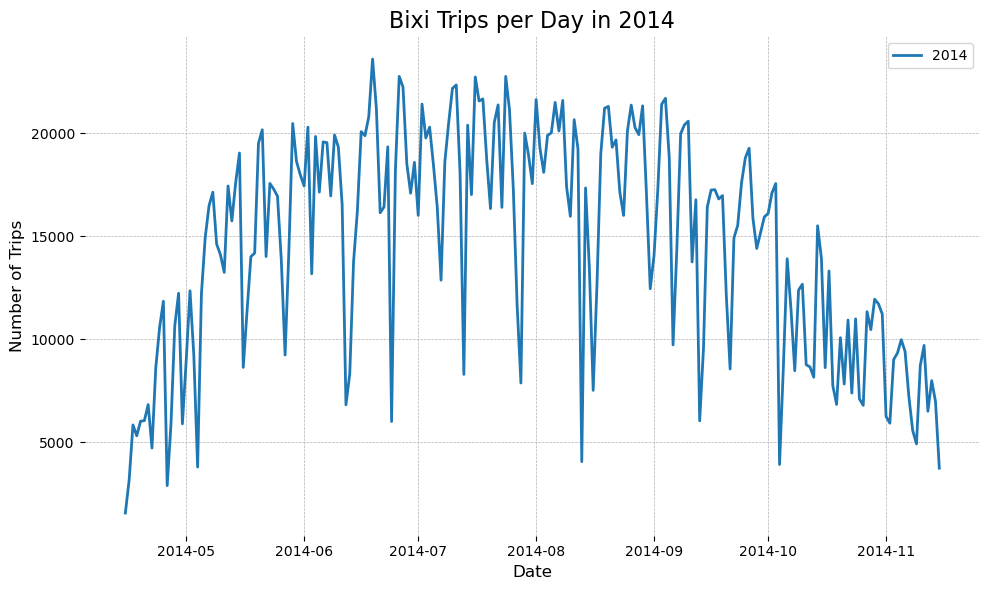

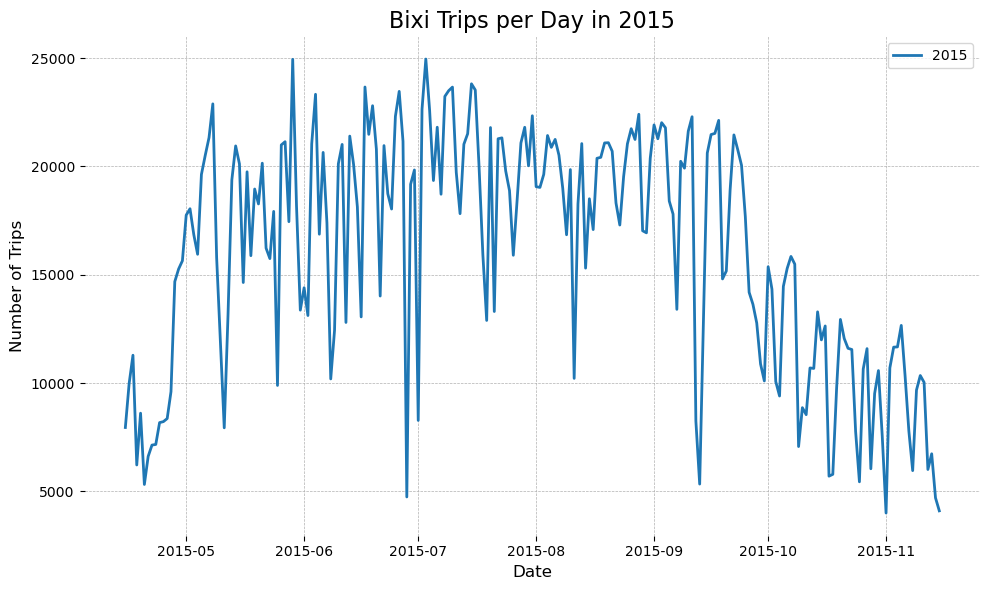

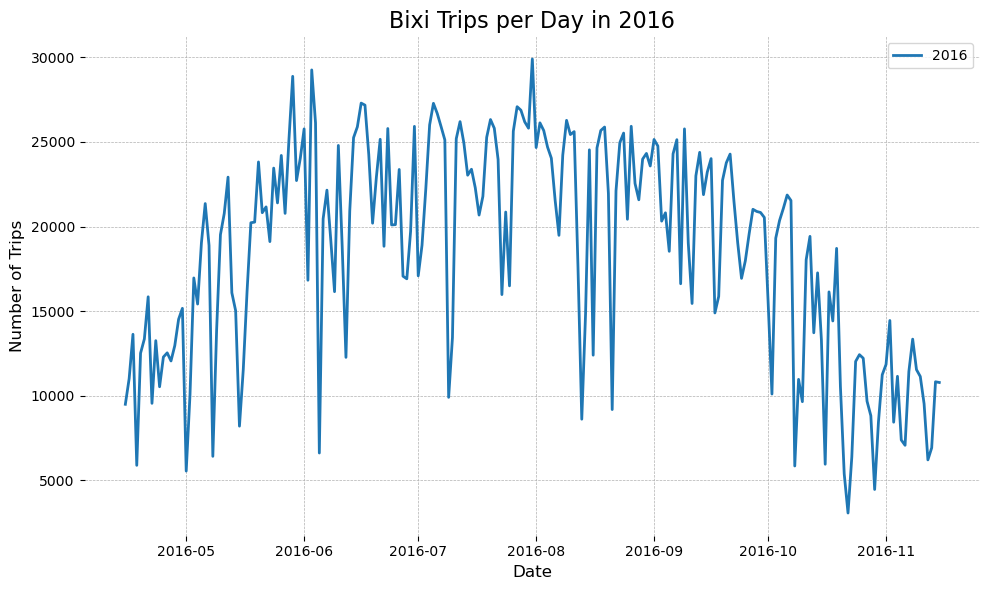

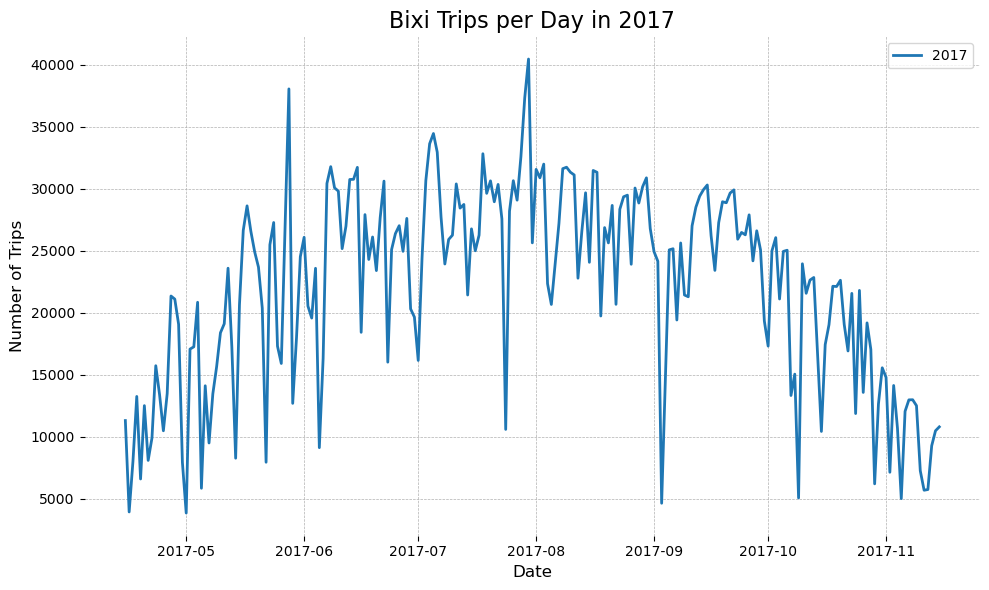

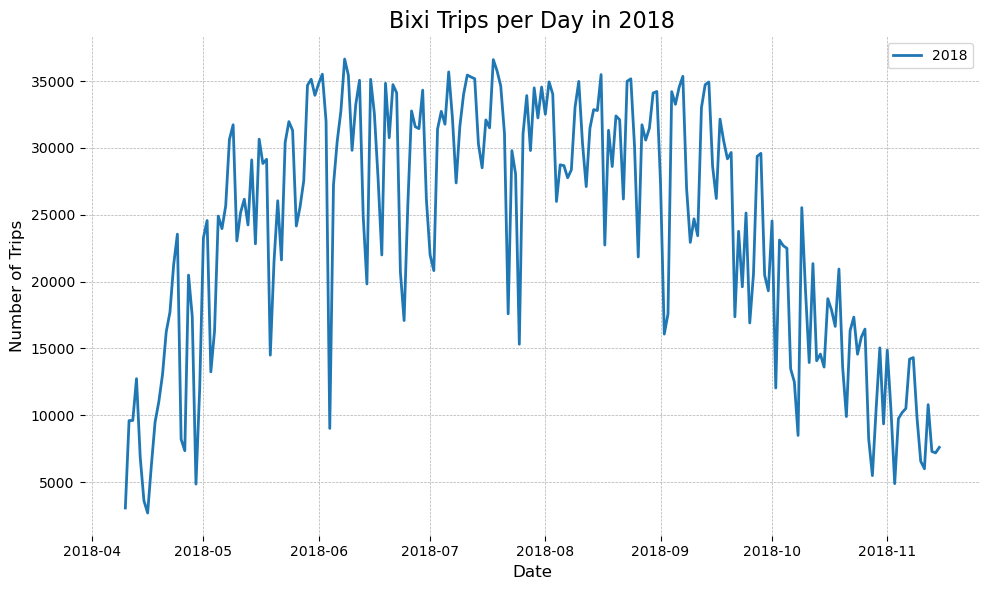

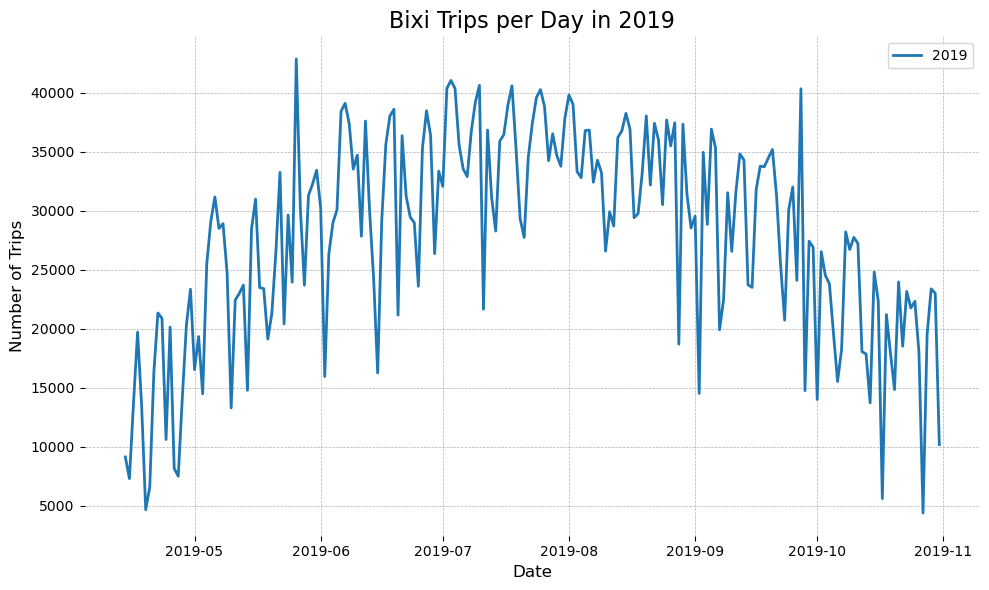

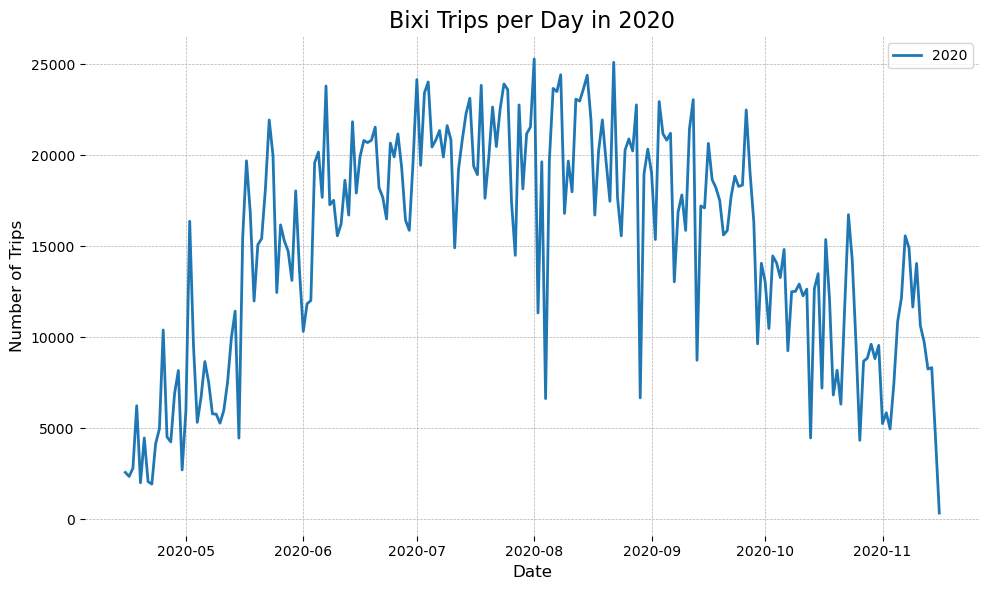

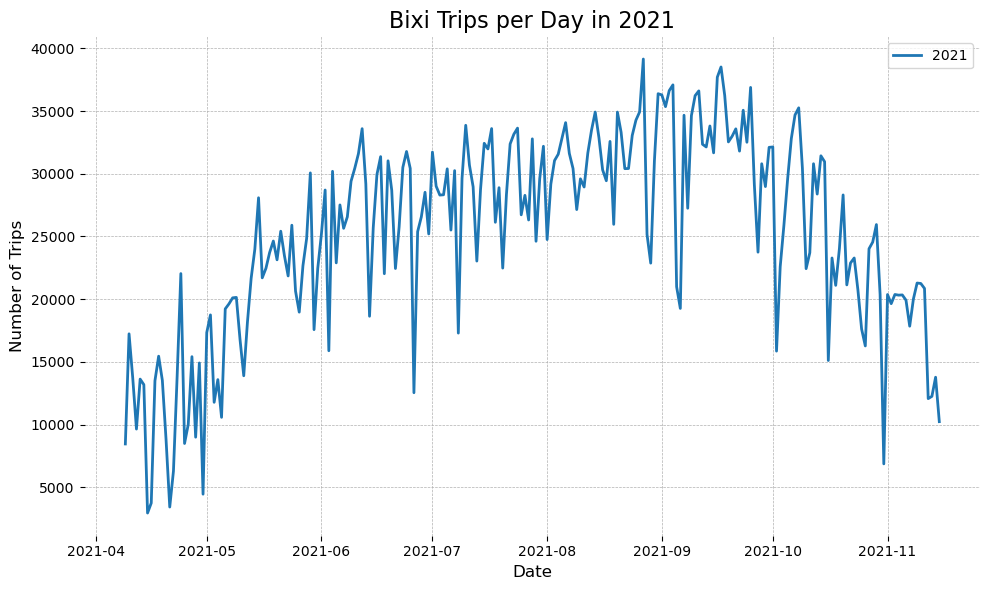

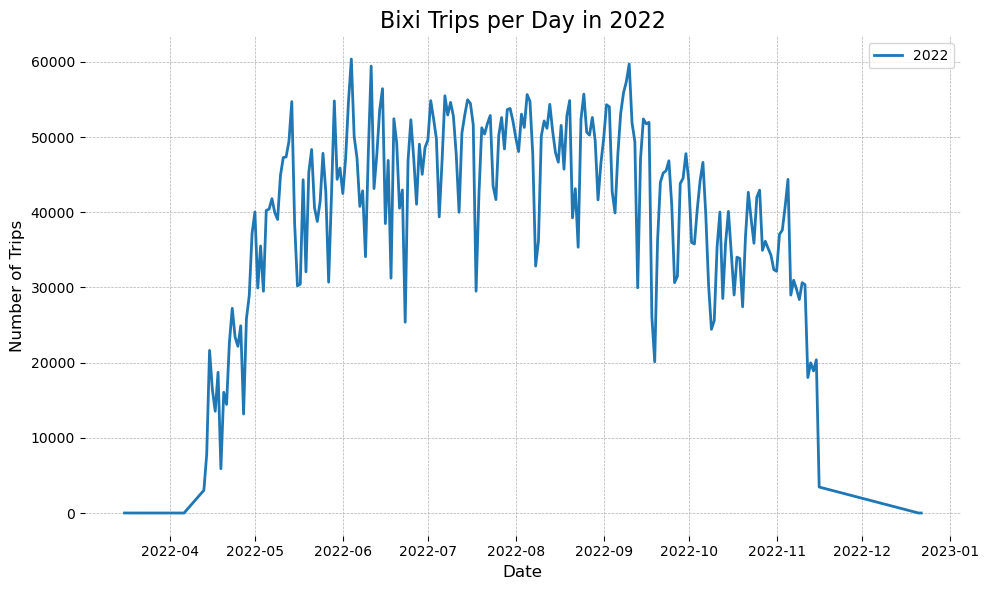

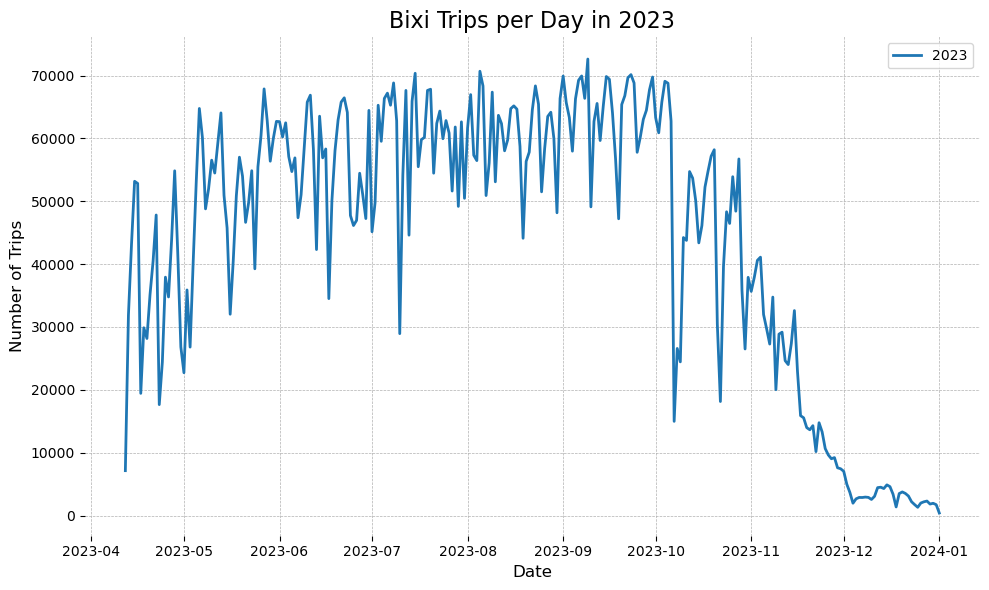

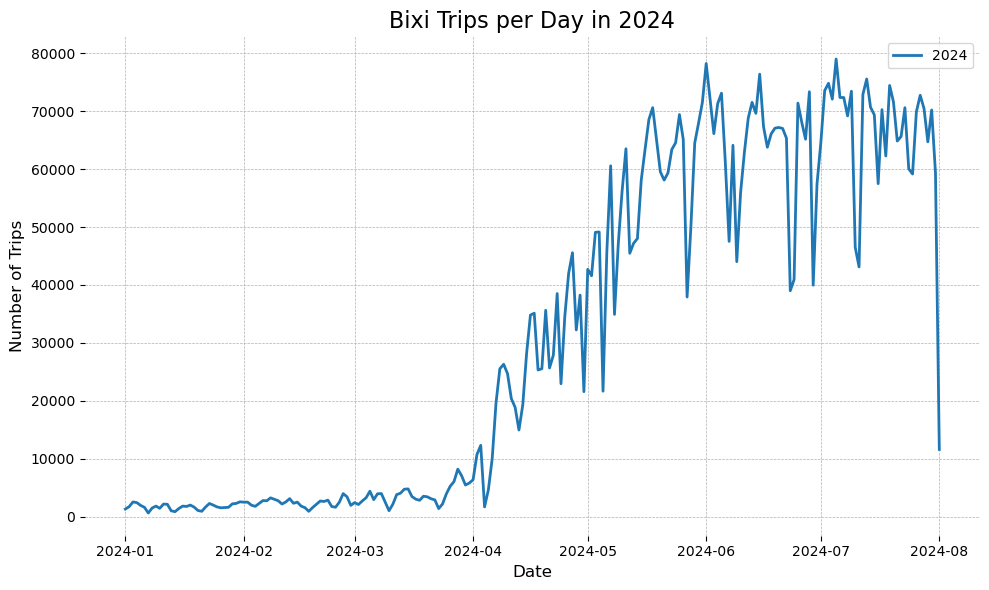

In [34]:
def plot_bixi_data_by_year(year):
    # Define the folder and file path for the cleaned data
    file_path = f'question2_data/trips/{year}_cleaned.csv'
    
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File for year {year} does not exist.")
        return
    
    # Read the cleaned CSV data
    df = pd.read_csv(file_path, parse_dates=['date'])
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot the number of trips per day
    plt.plot(df['date'], df['trips'], label=f"{year}", linewidth=2)
    
    # Customize the plot
    plt.title(f"Bixi Trips per Day in {year}", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Number of Trips", fontsize=12)
    
    # Make x-axis labels horizontal
    plt.xticks(rotation=0)
    
    # Remove plot borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Show legend
    plt.legend()
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage for 2022, 2023, and 2024
for year in range(2014,2025):
    plot_bixi_data_by_year(year)


### Retrieve and classify daily weather data from 2014 to 2024

In [39]:
def retrieve_and_classify_weather(year):
    
    save_folder = 'question2_data/weather'
    save_file = f'weather_daily_{year}.csv'

     # Create the save folder if it does not exist
    os.makedirs(save_folder, exist_ok=True)

    # Define the location (Point) for Montreal with latitude, longitude, and elevation
    montreal = Point(45.5017, -73.5673, 40)
    
    # Define the start and end date for the given year
    start = datetime(year, 1, 1)
    end = datetime(year, 12, 31)
    
    # Retrieve and normalize daily weather data for the given year
    data = Daily(montreal, start=start, end=end)
    data = data.normalize()  # Normalize the data
    data = data.fetch()      # Fetch the normalized data
    
    # Define classification rules for each type
    
    # Type 1: Rainy or Not Rainy
    def classify_rainy(row):
        if row['prcp'] >= 1 or row['snow'] > 0:
            return 'Rainy'
        else:
            return 'Not Rainy'

    # Type 2: Sunny or Cloudy
    def classify_sunny(row):
        if row['tsun'] >= 480:  # 8 hours of sunshine
            return 'Sunny'
        else:
            return 'Cloudy'

    # Type 3: Windy or Not Windy
    def classify_windy(row):
        if row['wspd'] >= 20:  # Wind speed >= 20 km/h
            return 'Windy'
        else:
            return 'Not Windy'
    
    # Type 4: Hot or Cold
    def classify_temperature(row):
        if row['tavg'] >= 20:  # Average temperature >= 20°C
            return 'Hot'
        else:
            return 'Cold'
    
    # Type 5: Humid or Not Humid
    def classify_humid(row):
        if row['pres'] < 1010:  # Pressure < 1010 hPa
            return 'Humid'
        else:
            return 'Not Humid'
    
    # Apply classifications to the dataset
    data['rainy_type'] = data.apply(classify_rainy, axis=1)
    data['sunny_type'] = data.apply(classify_sunny, axis=1)
    data['windy_type'] = data.apply(classify_windy, axis=1)
    data['temperature_type'] = data.apply(classify_temperature, axis=1)
    data['humidity_type'] = data.apply(classify_humid, axis=1)
    
    # Define the output file path
    output_file = f'{save_folder}/{save_file}'
    
    # Save the classified data to a CSV file
    data.to_csv(output_file, index=True)
    
    print(f"Weather data for {year} with classifications saved to {output_file}")


for year in range(2014,2025):
    retrieve_and_classify_weather(year)


Weather data for 2014 with classifications saved to question2_data/weather/weather_daily_2014.csv
Weather data for 2015 with classifications saved to question2_data/weather/weather_daily_2015.csv
Weather data for 2016 with classifications saved to question2_data/weather/weather_daily_2016.csv
Weather data for 2017 with classifications saved to question2_data/weather/weather_daily_2017.csv
Weather data for 2018 with classifications saved to question2_data/weather/weather_daily_2018.csv
Weather data for 2019 with classifications saved to question2_data/weather/weather_daily_2019.csv
Weather data for 2020 with classifications saved to question2_data/weather/weather_daily_2020.csv
Weather data for 2021 with classifications saved to question2_data/weather/weather_daily_2021.csv
Weather data for 2022 with classifications saved to question2_data/weather/weather_daily_2022.csv
Weather data for 2023 with classifications saved to question2_data/weather/weather_daily_2023.csv
Weather data for 202

### Mixing tables

In [43]:
import os
import pandas as pd

def merge_trips_weather():
    trips_folder = 'question2_data/trips'
    weather_folder = 'question2_data/weather'
    output_file = 'question2_data/merged_trips_weather.csv'
    
    # Initialize an empty DataFrame to accumulate the merged data
    all_data = pd.DataFrame()

    # Loop through all files in the trips folder
    for trips_file in os.listdir(trips_folder):
        if trips_file.endswith('_cleaned.csv'):
            # Extract the year from the file name (assuming it's in the format "YYYY_cleaned.csv")
            year = trips_file.split('_')[0]
            
            # Paths for trips and weather files
            trips_file_path = os.path.join(trips_folder, trips_file)
            weather_file_path = os.path.join(weather_folder, f'weather_daily_{year}.csv')  # No "classified" suffix
            
            # Read the trips data
            try:
                trips_data = pd.read_csv(trips_file_path, parse_dates=['date'])
            except Exception as e:
                print(f"Error reading trips file {trips_file}: {e}")
                continue
            
            # Read the weather data
            try:
                weather_data = pd.read_csv(weather_file_path, parse_dates=['time'])
                weather_data.rename(columns={'time': 'date'}, inplace=True)  # Rename 'time' column to 'date'
            except Exception as e:
                print(f"Error reading weather file for {year}: {e}")
                continue

            # Merge trips data with weather data on the 'date' column
            merged_data = pd.merge(trips_data, weather_data, on='date', how='inner')
            
            # Append the merged data to the accumulated DataFrame
            all_data = pd.concat([all_data, merged_data], ignore_index=True)
    
    # Sort the merged data by the 'date' column before saving
    all_data = all_data.sort_values(by='date')
    
    # Save the merged data to a CSV file
    all_data.to_csv(output_file, index=False)
    
    print(f"Merged trips and weather data saved to {output_file}")

# Example usage
merge_trips_weather()


Merged trips and weather data saved to question2_data/merged_trips_weather.csv


### Visualize weather x trips

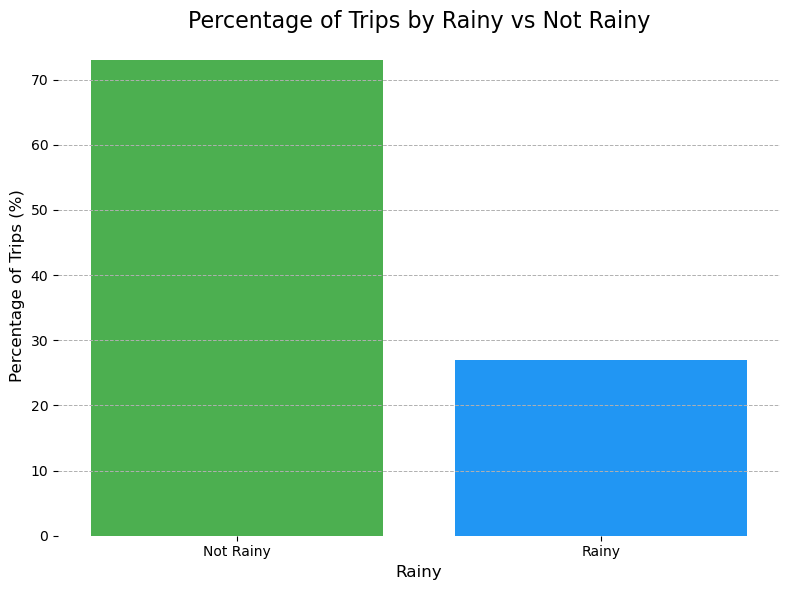

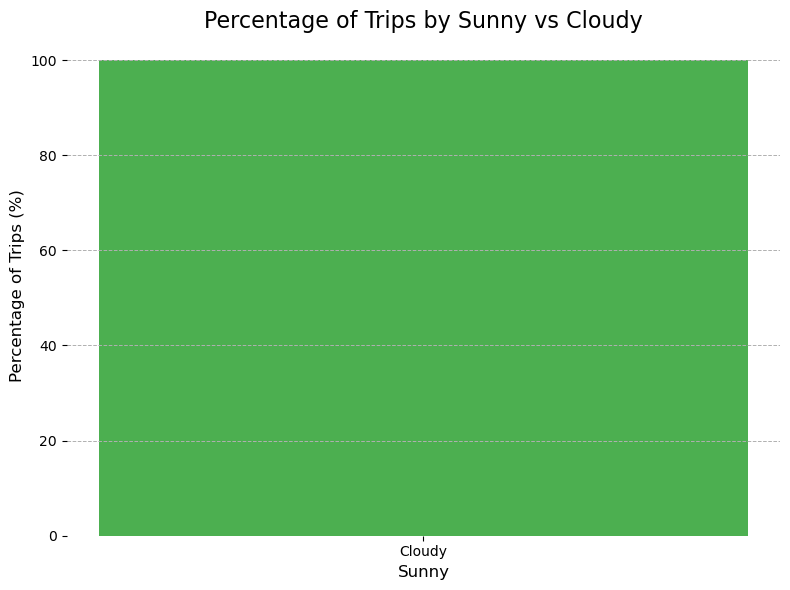

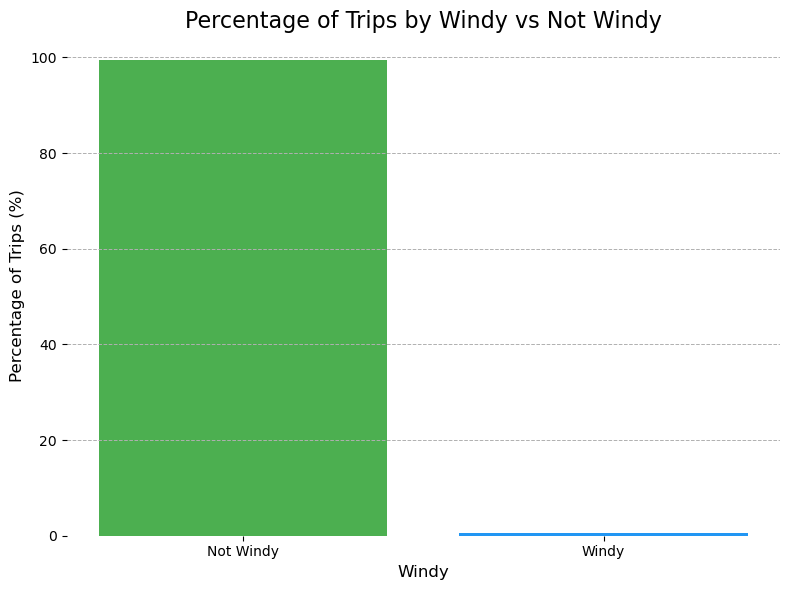

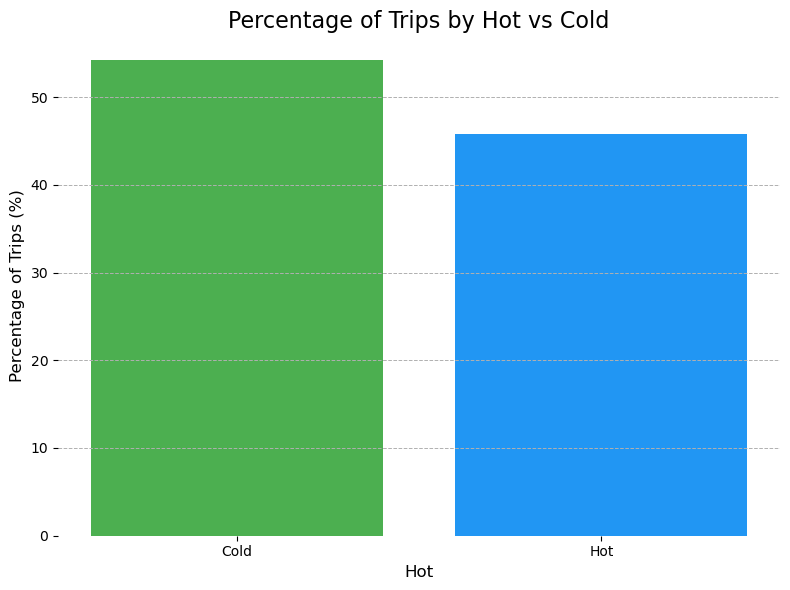

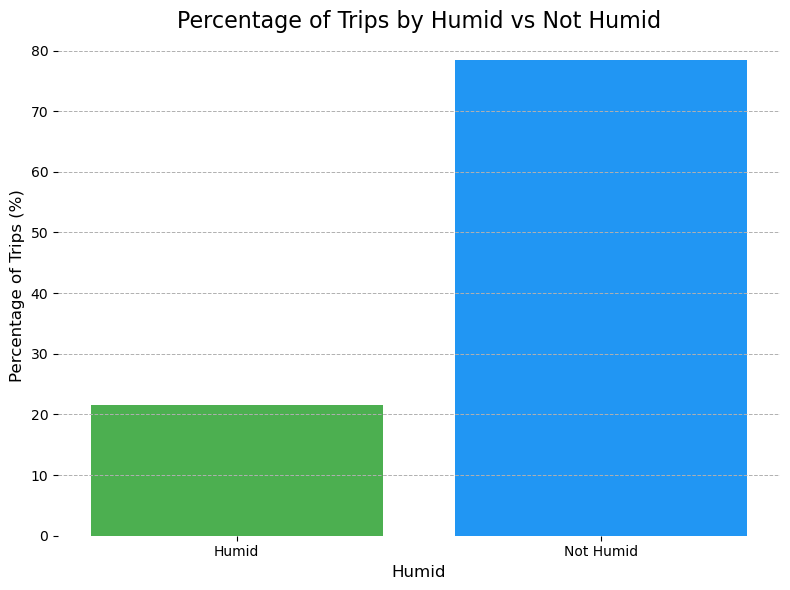


Percentages of Trips by Weather Classification:

--- Rainy vs Not Rainy ---
0: 45593037.0 trips, 72.98% of total
1: 16880472.0 trips, 27.02% of total

--- Sunny vs Cloudy ---
0: 62473509.0 trips, 100.00% of total

--- Windy vs Not Windy ---
0: 62111497.0 trips, 99.42% of total
1: 362012.0 trips, 0.58% of total

--- Hot vs Cold ---
0: 33869427.0 trips, 54.21% of total
1: 28604082.0 trips, 45.79% of total

--- Humid vs Not Humid ---
0: 13480287.0 trips, 21.58% of total
1: 48993222.0 trips, 78.42% of total



In [49]:
def visualize_weather_trips():
    # Define the file path for the merged trips and weather data
    merged_file = 'question2_data/merged_trips_weather.csv'
    
    # Read the merged data
    try:
        data = pd.read_csv(merged_file, parse_dates=['date'])
    except Exception as e:
        print(f"Error reading merged file: {e}")
        return
    
    # Define the classification columns and their titles
    classification_columns = ['rainy_type', 'sunny_type', 'windy_type', 'temperature_type', 'humidity_type']
    classification_titles = ['Rainy vs Not Rainy', 'Sunny vs Cloudy', 'Windy vs Not Windy', 'Hot vs Cold', 'Humid vs Not Humid']
    
    # Initialize a dictionary to store percentages for printing later
    percentages = {}
    
    # Loop over each classification type to create the plots and calculate percentages
    for col, title in zip(classification_columns, classification_titles):
        # Group the data by the classification type and sum the number of trips for each group
        grouped_data = data.groupby(col)['trips'].sum().reset_index()
        
        # Calculate the total number of trips to get the percentage
        total_trips = grouped_data['trips'].sum()
        grouped_data['percent'] = (grouped_data['trips'] / total_trips) * 100
        
        # Store the percentages for printing later
        percentages[title] = grouped_data[['trips', 'percent']]
        
        # Plot the data
        plt.figure(figsize=(8, 6))
        plt.bar(grouped_data[col], grouped_data['percent'], color=['#4CAF50', '#2196F3'])
        plt.title(f"Percentage of Trips by {title}", fontsize=16)
        plt.xlabel(f"{title.split(' vs ')[0]}", fontsize=12)
        plt.ylabel("Percentage of Trips (%)", fontsize=12)
        
        # Make sure the x-axis labels are horizontal
        plt.xticks(rotation=0)
        
        # Remove plot borders for a cleaner look
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        
        # Show grid for better readability
        plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
        
        # Display the plot
        plt.tight_layout()
        plt.show()
    
    # Print percentages for each classification type
    print("\nPercentages of Trips by Weather Classification:\n")
    for title, grouped_data in percentages.items():
        print(f"--- {title} ---")
        for _, row in grouped_data.iterrows():
            print(f"{row.name}: {row['trips']} trips, {row['percent']:.2f}% of total")
        print()

# Example usage
visualize_weather_trips()

